In [1]:
import os
import sys

REPO_PATH = "/home/hangkai/Chenchen/AIc_course_project/mmflood_repo_backup"
DATA_PATH = "/mnt/cephfs-mount/chenchen/mmflood_processed_v2"
OUTPUT_PATH = os.path.join(REPO_PATH, "output_experiments") 

if os.getcwd() != REPO_PATH:
    os.chdir(REPO_PATH)
    print(f"in: {os.getcwd()}")
else:
    print("right。")

os.makedirs(OUTPUT_PATH, exist_ok=True)


in: /home/hangkai/Chenchen/AIc_course_project/mmflood_repo_backup


In [10]:
!CUDA_VISIBLE_DEVICES=1 python run.py train \
  --name "ResNet101_UNet_SAR2_mr002_ws_BCE" \
  --data.path /mnt/cephfs-mount/chenchen/mmflood_processed_v2 \
  --output-folder /mnt/cephfs-mount/chenchen/mmflood_outputs_resnet101_unet_tversky \
  --trainer.batch-size 8 \
  --trainer.max-epochs 100 \
  --trainer.patience 25 \
  --data.in-channels 2 \
  --data.mask-body-ratio 0.02 \
  --data.weighted-sampling \
  --model.encoder resnet101 \
  --model.decoder unet \
  --model.no-pretrained \
  --loss.target bce \
  --optimizer.target adamw \
  --optimizer.lr 1e-3 \
  --optimizer.weight-decay 1e-2 \
  --scheduler.target poly


/home/hangkai/miniconda3/envs/py310/lib/python3.10/site-packages/torch/cuda/__init__.py:61: FutureWarning: The pynvml package is deprecated. Please install nvidia-ml-py instead. If you did not install pynvml directly, please report this to the maintainers of the package that installed pynvml for you.
  import pynvml  # type: ignore[import]
/home/hangkai/miniconda3/envs/py310/lib/python3.10/site-packages/timm/models/features.py:4: FutureWarning: Importing from timm.models.features is deprecated, please import via timm.models
  warnings.warn(f"Importing from {__name__} is deprecated, please import via timm.models", FutureWarning)
[2025-12-04 06:39] floods.training         : INFO     - Run started
[2025-12-04 06:39] floods.training         : INFO     - Experiment ID: ResNet101_UNet_SAR2_mr002_ws_BCE
[2025-12-04 06:39] floods.training         : INFO     - Output folder: /mnt/cephfs-mount/chenchen/mmflood_outputs_resnet101_unet_tversky/ResNet101_UNet_SAR2_mr002_ws_BCE
[2025-12-04 06:39] flo

[2025-12-04 11:28] floods.testing          : INFO     - seed                : 1337
[2025-12-04 11:28] floods.testing          : INFO     - image_size          : 512
[2025-12-04 11:28] floods.testing          : INFO     - trainer             : {'cpu': False, 'amp': True, 'batch_size': 8, 'num_workers': 4, 'max_epochs': 100, 'train_metrics': [<Metrics.iou: Initializer(<class 'floods.metrics.IoU'>, ignore_index=255)>], 'val_metrics': [<Metrics.f1: Initializer(<class 'floods.metrics.F1Score'>, ignore_index=255)>, <Metrics.iou: Initializer(<class 'floods.metrics.IoU'>, ignore_index=255)>, <Metrics.precision: Initializer(<class 'floods.metrics.Precision'>, ignore_index=255, reduction='macro')>, <Metrics.recall: Initializer(<class 'floods.metrics.Recall'>, ignore_index=255, reduction='macro')>], 'monitor': <Metrics.iou: Initializer(<class 'floods.metrics.IoU'>, ignore_index=255)>, 'patience': 25, 'validate_every': 1, 'temperature': 2.0, 'temp_epochs': 20}
[2025-12-04 11:28] floods.testing    

已经在正确目录。


[2025-12-04 11:28] floods.testing          : INFO     - Preparing model...
[2025-12-04 11:28] floods.prepare          : INFO     - Returning intermediate features: False
/home/hangkai/Chenchen/AIc_course_project/mmflood_repo_backup/floods/testing.py:78: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don

Epoch 0   - test:   0%| | 0/386 [00:00<?, ?batch/s, lo

/home/hangkai/miniconda3/envs/mmflood_py38/lib/python3.8/site-packages/accelerate/accelerator.py:304: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  model.forward = torch.cuda.amp.autocast()(model.forward)


Epoch 0   - test: 100%|█| 386/386 [00:49<00:00,  7.87b

[2025-12-04 11:29] floods.trainer.base     : INFO     - test/f1: 0.7700, test/iou: 0.6261, test/precision: 0.7376, test/recall: 0.8055, test/fg_iou: 0.6261, test/fg_f1: 0.7700, test/bg_iou: 0.9358, test/bg_f1: 0.9668
[2025-12-04 11:29] floods.trainer.callbacks: WARNING  - No content to be displayed
[2025-12-04 11:29] floods.testing          : INFO     - Testing completed, average loss: 0.1335
[2025-12-04 11:29] floods.testing          : INFO     - Average results:
[2025-12-04 11:29] floods.testing          : INFO     - f1                  : 0.7700
[2025-12-04 11:29] floods.testing          : INFO     - iou                 : 0.6261
[2025-12-04 11:29] floods.testing          : INFO     - precision           : 0.7376
[2025-12-04 11:29] floods.testing          : INFO     - recall              : 0.8055
[2025-12-04 11:29] floods.testing          : INFO     - fg_iou              : 0.6261
[2025-12-04 11:29] floods.testing          : INFO     - fg_f1               : 0.7700
[2025-12-04 11:29] fl

[2025-12-04 11:29] floods.testing          : INFO     - Testing done!


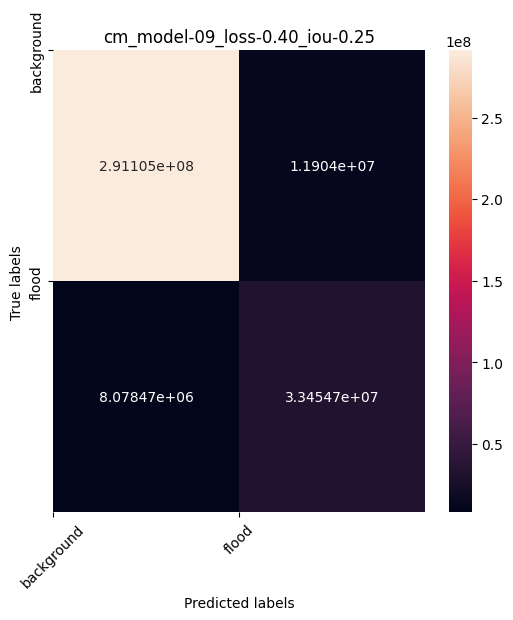

In [11]:
import os, sys

os.environ["CUDA_VISIBLE_DEVICES"] = "1"   
REPO_PATH = "/home/hangkai/Chenchen/AIc_course_project/mmflood_repo_backup"

if os.getcwd() != REPO_PATH:
    os.chdir(REPO_PATH)
    print(f"工作目录已切换至: {os.getcwd()}")
else:
    print("已经在正确目录。")

sys.path.append(REPO_PATH)

from floods.utils.common import prepare_logging
prepare_logging()


from floods.config.testing import TestConfig

config = TestConfig(

    name="ResNet101_UNet_SAR2_mr002_ws_BCE",
    data={
        "path": "/mnt/cephfs-mount/chenchen/mmflood_processed_v2",
        "in_channels": 2,        # SAR-only (VV + VH)
    },


    output_folder="/mnt/cephfs-mount/chenchen/mmflood_outputs_resnet101_unet_tversky",

    visualize=True,
    num_samples=12,     
)

from floods.testing import test
test(config)
